<h2><center>Introduction to Machine Learning: Assignment 2</center></h2>

__Given date:__ Monday September 27

__Due date:__ Friday October 15

#### Question 1 Least Absolute Shrinkage and Selection Operator 

__(13pts)__

Learning a model through the OLS loss can be done very efficiently through either gradient descent or even through the Normal equations. The same is true for ridge regression. For the Lasso formulation however, the non differentiability of the absolute value at $0$ makes the learning more tricky.



One approach, known as _ISTA_ (see Amir Beck and Marc Teboulle, _A Fast Iterative Shrinkage-Thresholding Algorithm for Linear Inverse Problems_) consists in combining traditional gradient descent steps with a projection onto the $\ell_1$ norm ball. Concretely, for the LASSO objective 

\begin{align}
\ell(\boldsymbol \beta) = \|\boldsymbol X\boldsymbol \beta - \boldsymbol t\|^2_2 + \lambda \|\boldsymbol \beta\|_1
\end{align}

where $\boldsymbol \beta = (\beta_1, \beta_2,\ldots, \beta_D)$ (note that we don't include the bias) and the feature vectors $\left\{\boldsymbol  x_i\right\}_{i=1}^N$ (corresponding to the rows of the matrix $\boldsymbol X$) as well as the targets $t_i$ are assumed to be centered, i.e.
\begin{align}
\boldsymbol x_{ij} \leftarrow \boldsymbol x_{ij}-  \frac{1}{N}\sum_{i=1}^{N} x_{ij}\\
t_i \leftarrow t_i - \frac{1}{N}\sum_{i=1}^N t_i
\end{align}

(Note that this is equivalent to taking $\beta_0 = \frac{1}{N}\sum_{i=1}^N t_i$)
The ISTA update takes the form 

\begin{align}
\boldsymbol \beta^{k+1} \leftarrow \mathcal{T}_{\lambda \eta} (\boldsymbol \beta^{k} - 2\eta \mathbf{X}^T(\mathbf{X}\mathbf{\beta} - \mathbf{t}))
\end{align}

where $\mathcal{T}_{\lambda \eta}(\mathbf{x})_i$ is the thresholding operator defined component-wise as

\begin{align}
\mathcal{T}_{\lambda t}(\mathbf{\beta})_i = (|\beta_i| - \lambda t)_+ \text{sign}(\beta_i)
\end{align}

In the equations above, $\eta$ is an appropriate step size and $(x)_+ = \max(x, 0)$ 

##### Question 1.1. (5pts)

Complete the function 'ISTA' which must return a final estimate for the regression vector $\mathbf{\beta}$ given a feature matrix $\mathbf{X}$, a target vector $\mathbf{t}$ (the function should include the centering steps for $\mathbf{x}_i$ and $t_i$) regularization weight $\lambda$, and the choice for the learning rate $\eta$. 

In [144]:
import numpy as np
import matplotlib.pyplot as plt


max_iter = 1000


def ISTA(beta_init, X, t, lbda, eta):
	'''The function takes as input an initial guess for beta, a set
	of feature vectors stored in X and their corresponding
	targets stored in t, a regularization weight lbda,
	step size parameter eta and must return the
	regression weights following from the minimization of
	the LASSO objective'''

	# "center the data"
	# X = np.copy(X)
	# for column_position in np.arange(np.shape(X)[1]):
	# 	X[:, column_position] = X[:, column_position] - np.average(X[:, column_position])
	#
	# t[:, 0] = t[:, 0] - np.average(t[:, 0])

	ISTA_loss_temp = np.zeros((max_iter, 1))
	beta_LASSO = np.zeros((np.shape(X)[1], 1))

	# add your code here
	beta_LASSO += beta_init
	for i in np.arange(max_iter):
		descent_temp1 = beta_LASSO - 2 * eta * np.matmul(X.transpose(), (np.matmul(X, beta_LASSO) - t))
		# beta_LASSO = np.multiply(np.maximum((np.absolute(descent_temp1) - lbda * eta), 0.), np.sign(descent_temp1))
		beta_LASSO = np.sign(descent_temp1) * np.maximum(np.abs(descent_temp1) - lbda*eta, 0.)
		ISTA_loss_temp[i, 0] = np.sum((np.matmul(X, beta_LASSO) - t)**2)/np.shape(X)[0]

	# "de-center beta_0"
	# beta_LASSO[:, 0] *= np.shape(t)[0]
	return beta_LASSO, ISTA_loss_temp
    

##### Question 1.2.  (3pts)

Apply your algorithm to the data (in red) given below for polynomial features up to degree 8-10 and for various values of $\lambda$. Display the result on top of the true model (in blue).

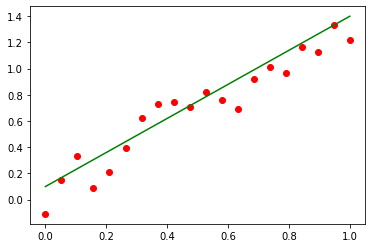

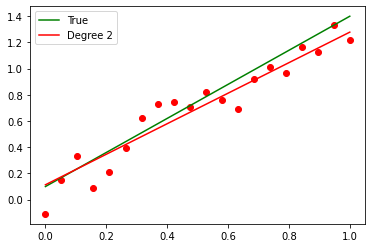

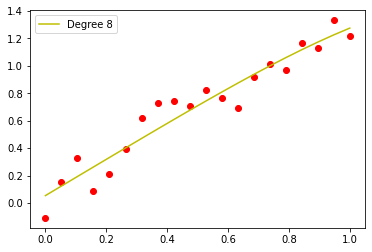

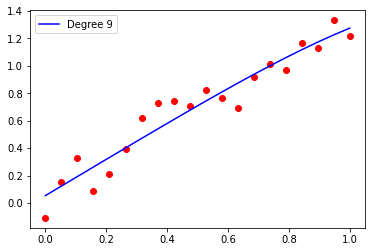

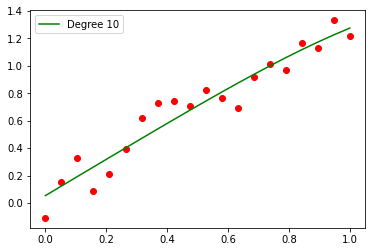

[[0.11350022]
 [1.16509298]]


In [145]:
from sklearn.preprocessing import PolynomialFeatures


x = np.linspace(0, 1, 20)
xtrue = np.linspace(0, 1, 100)
t_true = 0.1 + 1.3 * xtrue


t = 0.1 + 1.3 * x

tnoisy = t + np.random.normal(0, .1, len(x))

plt.scatter(x, tnoisy, c='r')
plt.plot(xtrue, t_true, c="g")
plt.show()


eta = 0.001
lbda = 0.05

beta_init = np.hstack((np.asarray([10]), np.random.random(1)*10)).reshape(2, 1)
XPrediction = np.hstack((np.ones((len(x),)).reshape(-1, 1), x.reshape(-1, 1)))
beta_LASSO_ISTA, ISTA_loss = ISTA(beta_init, XPrediction, tnoisy.reshape(-1, 1), lbda, eta)
tPrediction = np.matmul(XPrediction, beta_LASSO_ISTA)

"""Poly degree 8"""
poly_8 = PolynomialFeatures(8)
XPrediction_poly8 = poly_8.fit_transform(XPrediction)
beta_LASSO_ISTA_8, ISTA_loss_8 = ISTA(np.ones((45, 1)), XPrediction_poly8, tnoisy.reshape(-1, 1), lbda, eta)
tPrediction_8 = np.matmul(XPrediction_poly8, beta_LASSO_ISTA_8)

"""Poly degree 9"""
poly_9 = PolynomialFeatures(9)
XPrediction_poly9 = poly_9.fit_transform(XPrediction)
beta_LASSO_ISTA_9, ISTA_loss_9 = ISTA(np.ones((55, 1)), XPrediction_poly9, tnoisy.reshape(-1, 1), lbda, eta)
tPrediction_9 = np.matmul(XPrediction_poly8, beta_LASSO_ISTA_8)

"""Poly degree 10"""
poly_10 = PolynomialFeatures(10)
XPrediction_poly10 = poly_10.fit_transform(XPrediction)
beta_LASSO_ISTA_10, ISTA_loss_10 = ISTA(np.ones((66, 1)), XPrediction_poly10, tnoisy.reshape(-1, 1), lbda, eta)
tPrediction_10 = np.matmul(XPrediction_poly8, beta_LASSO_ISTA_8)




plt.plot(xtrue, t_true, c="g", label="True")
plt.plot(x, tPrediction, c="r", label="Degree 2")
plt.scatter(x, tnoisy, c='r')
plt.legend()
plt.show()

plt.plot(x, tPrediction_8, c="y", label="Degree 8")
plt.scatter(x, tnoisy, c='r')
plt.legend()
plt.show()

plt.plot(x, tPrediction_9, c="b", label="Degree 9")
plt.scatter(x, tnoisy, c='r')
plt.legend()
plt.show()

plt.plot(x, tPrediction_10, c="g", label="Degree 10")
plt.scatter(x, tnoisy, c='r')
plt.legend()
plt.show()

print(beta_LASSO_ISTA)

##### Question 1.3 FISTA (3pts)

It is possible to improve the ISTA updates by combining them with Nesterov accelerated gradient descent. The resulting update, known as FISTA can read, for a constant step size, by 
letting $\mathbf{y}^{(1)} = {\boldsymbol \beta}^{(0)}$, $\eta^1 = 1$ and then using 

\begin{align}
\left\{
\begin{array}{l}
&\boldsymbol{\beta}^{k+1} = \text{ISTA}(\mathbf{y}^{k})\\
&\eta^{(k+1)} = \frac{1+\sqrt{1+4(\eta^{(k)})^2}}{2}\\
&\mathbf{y}^{(k+1)} = \mathbf{x}^{(k)} + \left(\frac{\eta^{(k)} - 1}{\eta^{(k+1)}}\right)\left({\boldsymbol\beta}^{(k)} - {\boldsymbol\beta}^{(k-1)}\right)\end{array}\right.
\end{align}

Here $\text{ISTA}$ denotes a __single__ ISTA update.

Complete the function below so that it performs the FISTA iterations. Then apply it to the data given in question 1.2.

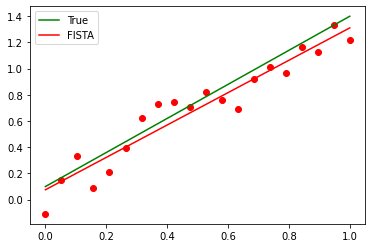

[[0.07547535]
 [1.23562538]]


In [146]:
def FISTA(X, t, eta0, beta0, lbda):
	'''function should return the solution to the minimization of the
	the LASSO objective ||X*beta - t||_2^2 + lambda*||beta||_1
	by means of FISTA updates'''

	eta = eta0
	y_LASSO = beta0
	t_temp = 1
	FISTA_loss_temp = np.zeros((max_iter, 1))

	# "center the data"
	# X = np.copy(X)
	# for column_position in np.arange(np.shape(X)[1]):
	# 	X[:, column_position] = X[:, column_position] - np.average(X[:, column_position])
	#
	# t[:, 0] = t[:, 0] - np.average(t[:, 0])

	for i in np.arange(max_iter):
		descent_temp = y_LASSO - 2 * eta * np.matmul(X.transpose(), (np.matmul(X, y_LASSO) - t))
		x_temp = np.sign(descent_temp) * np.maximum(np.abs(descent_temp) - lbda*eta, 0.)
		t_new = (1+np.sqrt(1+4*t_temp**2))/2
		y_LASSO = x_temp + ((t_temp-1)/t_new)*(x_temp-y_LASSO)
		t_temp = t_new
		FISTA_loss_temp[i, 0] = np.sum((np.matmul(X, y_LASSO) - t) ** 2)/np.shape(X)[0]
	# "de-center beta_0"
	# y_LASSO[:, 0] *= np.shape(t)[0]
	return y_LASSO, FISTA_loss_temp


beta_LASSO_FISTA, FISTA_loss = FISTA(XPrediction, tnoisy.reshape(-1, 1), eta, beta_init, lbda)

tPrediction = np.matmul(XPrediction, beta_LASSO_FISTA)

plt.plot(xtrue, t_true, c="g", label="True")
plt.plot(x, tPrediction, c="r", label="FISTA")
plt.scatter(x, tnoisy, c='r')
plt.legend()
plt.show()
print(beta_LASSO_FISTA)




##### Question 1.4. (2pts)

Compare the ISTA and FISTA updates by plotting the evolution of the loss $\ell(\mathbf{\beta})$ as a function of the iterations for both approaches. Take a sufficient number of iterations (1000 - 10,000)

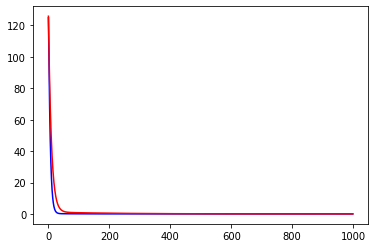

In [147]:
import matplotlib.pyplot as plt

plt.plot(FISTA_loss, c="b")
plt.plot(ISTA_loss, c="r")
plt.show()

#### Question 2. Classification Trees

__(10pts)__

When the data is not easily separable, it remains possible to learn a tree based classifier. For a dataset that consists of pairs $\left\{(\mathbf{x}_i, t_i)\right\}_{i=1, \ldots, N}$ where $\mathbf{x}_i = (x_{i1}, x_{i2})\in \mathbb{R}^2$. We start with all the data in a single class. We then consider a split point $(j,s)$ such that it defines the two regions $R_1(j,s) = \left\{x|x_j\leq s\right\}$ and $R_2(j, s) = \left\{x|x_j>s\right\}$

In general we seek the splitting variables $j$ and split point $s$ that solve 
\begin{align}
\min_{j, s} \left[\min_{c_1} \sum_{\mathbf{x}_i\in R_1(j, s)} (t_i - c_1)^2 + \min_{c_2} \sum_{\mathbf{x}_i\in R_2(j, s)} (t_i - c_2)^2\right]
\end{align}

For which the inner minimization is solved by 
\begin{align}
\hat{c}_1 = \text{average}(t_i|\mathbf{x}_i \in R_1(j, s))
\end{align}
and 
\begin{align}
\hat{c}_2 = \text{average}(t_i|\mathbf{x}_i \in R_2(j, s))
\end{align}

Having found the best split, we partition the data into the corresponding two regions and repeat the splitting process on each of the two regions. Note that $s$ should always be taken amond the training points.


##### Question 2.1. (10pts)

Build a classification tree for the dataset given below with a stopping criterion corresponding to a target that is constant (or almost) across regions. Then plot the result with meshgrid and contourf. 

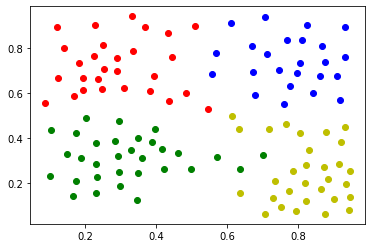

123


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


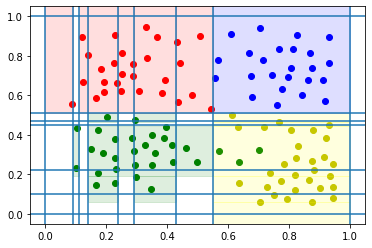

In [148]:
import scipy.io

class1 = scipy.io.loadmat('points_Assignment2_Ex2_class1.mat')['points_Assignment2_Ex2_class1']
class2 = scipy.io.loadmat('points_Assignment2_Ex2_class2.mat')['points_Assignment2_Ex2_class2']
class3 = scipy.io.loadmat('points_Assignment2_Ex2_class3.mat')['points_Assignment2_Ex2_class3']
class4 = scipy.io.loadmat('points_Assignment2_Ex2_class4.mat')['points_Assignment2_Ex2_class4']


plt.scatter(class1[:, 0], class1[:, 1], c="r")
plt.scatter(class2[:, 0], class2[:, 1], c="g")
plt.scatter(class3[:, 0], class3[:, 1], c="b")
plt.scatter(class4[:, 0], class4[:, 1], c="y")
plt.show()

"Construct the target dataset"
class1_with_label = np.append(class1, [[0]]*np.shape(class1)[0], axis=1)
class2_with_label = np.append(class2, [[1]]*np.shape(class2)[0], axis=1)
class3_with_label = np.append(class3, [[2]]*np.shape(class3)[0], axis=1)
class4_with_label = np.append(class4, [[3]]*np.shape(class4)[0], axis=1)

data_with_label = np.vstack((class1_with_label, class2_with_label, class3_with_label, class4_with_label))

print("123")


axis_0_guess = []
axis_1_guess = []
"""Define a function that does one split step for us
   @:param j: which dimension we wanna do split on
   @:param data_temp: the dataset we are going to split along with labels
   @:param low: the starting lower bound
   @:param high: the ending upper bound
   @:param current_loss: the loss that we got by doing the last split

   @:return [s]: the splitting points on axis"""
def split(j, data_temp, low, high, current_loss):
	if current_loss <= 0.1:
		return []
	step_size = 0.01
	num_iter = (high-low)//step_size

	# "sort data_temp for the given dimension j"
	# data_temp = data_temp[np.argsort(data_temp[:j])]

	loss_list = []

	for i in np.arange(num_iter):
		R1 = data_temp[(data_temp[:, j]<=i*step_size)]
		R2 = data_temp[(data_temp[:, j]>i*step_size)]
		c1_hat = np.average(R1[:, 2])
		c2_hat = np.average(R2[:, 2])

		loss_R1 = np.sum((R1[:, 2]-c1_hat)**2)
		loss_R2 = np.sum((R2[:, 2]-c2_hat)**2)

		loss_list.append(loss_R1+loss_R2)

	min_loss = min(loss_list)
	position = loss_list.index(min_loss)
	s = position*step_size + low

	R1 = data_temp[(data_temp[:, j] <= s)]
	R2 = data_temp[(data_temp[:, j] > s)]
	c1_hat = np.average(R1[:, 2])
	c2_hat = np.average(R2[:, 2])

	loss_R1 = np.sum((R1[:, 2] - c1_hat) ** 2)
	loss_R2 = np.sum((R2[:, 2] - c2_hat) ** 2)
	if low == s or high == s:
		return []
	return split(j, R1, low, s, loss_R1) + [s] + split(j, R2, s, high, loss_R2)


min_loss_axis_0 = float("inf")
min_loss_axis_1 = float("inf")
axis_0_splitpoint_list = [0]
axis_1_splitpoint_list = [0]
"Trial starting with feature 1 and then go on with feature 2"
axis_0_splitpoint_list += split(0, data_with_label, 0, 1, min_loss_axis_0)
axis_1_splitpoint_list += split(1, data_with_label, 0, 1, min_loss_axis_1)
axis_0_splitpoint_list += [1]
axis_1_splitpoint_list += [1]
plt.scatter(class1[:, 0], class1[:, 1], c="r")
plt.scatter(class2[:, 0], class2[:, 1], c="g")
plt.scatter(class3[:, 0], class3[:, 1], c="b")
plt.scatter(class4[:, 0], class4[:, 1], c="y")

for split_point in axis_0_splitpoint_list:
	plt.axvline(x=split_point)
for split_point in axis_1_splitpoint_list:
	plt.axhline(y=split_point)

for position_0, axis_0_splitpoint in enumerate(axis_0_splitpoint_list[1:]):
	for position_1, axis_1_splitpoint in enumerate(axis_1_splitpoint_list[1:]):
		region_to_consider = [(axis_0_splitpoint_list[position_0], axis_1_splitpoint_list[position_1]), (axis_0_splitpoint, axis_1_splitpoint)]
		data_to_consider = data_with_label[(data_with_label[:, 0] >= region_to_consider[0][0]) & (data_with_label[:, 0] <= region_to_consider[1][0]) &
										   (data_with_label[:, 1] >= region_to_consider[0][1]) & (data_with_label[:, 1] <= region_to_consider[1][1])]
		region_c_hat = np.average(data_to_consider[:, 2])
		region_guess = round(region_c_hat, 0)
		if region_guess == 0:
			plt.axvspan(region_to_consider[0][0], region_to_consider[1][0],
						ymin=region_to_consider[0][1], ymax=region_to_consider[1][1], color="red", alpha=0.13)
		elif region_guess == 1:
			plt.axvspan(region_to_consider[0][0], region_to_consider[1][0],
						ymin=region_to_consider[0][1], ymax=region_to_consider[1][1], color="green", alpha=0.13)
		elif region_guess == 2:
			plt.axvspan(region_to_consider[0][0], region_to_consider[1][0],
						ymin=region_to_consider[0][1], ymax=region_to_consider[1][1], color="blue", alpha=0.13)
		elif region_guess == 3:
			plt.axvspan(region_to_consider[0][0], region_to_consider[1][0],
						ymin=region_to_consider[0][1], ymax=region_to_consider[1][1], color="yellow", alpha=0.13)
plt.show()
